In [79]:
import sys; sys.path.append('../../')
from DataPreparation.DataPreparation import read_data, convey_insights
from ModelPipelines.ModelAnalysis import recursive_feature_elimination, log_weights_analysis, show_hyperparams, vc_dimension_check,validation_curves,learning_curves, BiasVariance
from sklearn.metrics import classification_report
from HandleClassImbalance.HandleClassImbalance import *
from ModelPipelines.ModelVisualization import VisualizeModel
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import clear_output, HTML
from utils import nice_table, save_hyperparameters, load_hyperparameters, get_metrics
import numpy as np
from sklearn.ensemble import RandomForestClassifier
model_name = 'RandomForest'

# <font color="LemonChiffon">Random Forest</font> Analysis

### Initialization

In [80]:
x_data_d, y_data_d = read_data(kind='Numerical')
opt_params = load_hyperparameters(model_name)
clf = RandomForestClassifier(**opt_params)
clf.fit(x_data_d, y_data_d)
show_hyperparams(clf)
convey_insights([])

bootstrap,ccp_alpha,class_weight,criterion,max_depth,max_features,max_leaf_nodes,max_samples,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_jobs,oob_score,random_state,verbose,warm_start
True,0.0,None,entropy,40,None,None,None,0.0,5,13,0.0,200,None,False,None,0,False


<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
</font>

<h2><font color="LemonChiffon"> Model Analysis </font></h2>

In [81]:
vc_dimension_check(clf, x_data_d)

<font size=4>By estimating the VC dimension of the model, 
                    we have $d_{vc}=58080$. 
                    Since, $N=1180$, here it holds that that 
                    $$N < 10d_{vc}$$ 
                    Hence, generalization is not guaranteed and its advised to reduce the model complexity.
                    </font>
                    

### Bias-Variance

In [82]:
BiasVariance(clf, x_data_d, y_data_d)
convey_insights([])

Train Accuracy,Val Accuracy,Aviodable Bias <,Variance
0.984,0.955,0.016,0.029


Train WF1,Val WF1,Aviodable Bias,Variance
0.984,0.955,0.016,0.029


<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
</font>

### Learning Curve

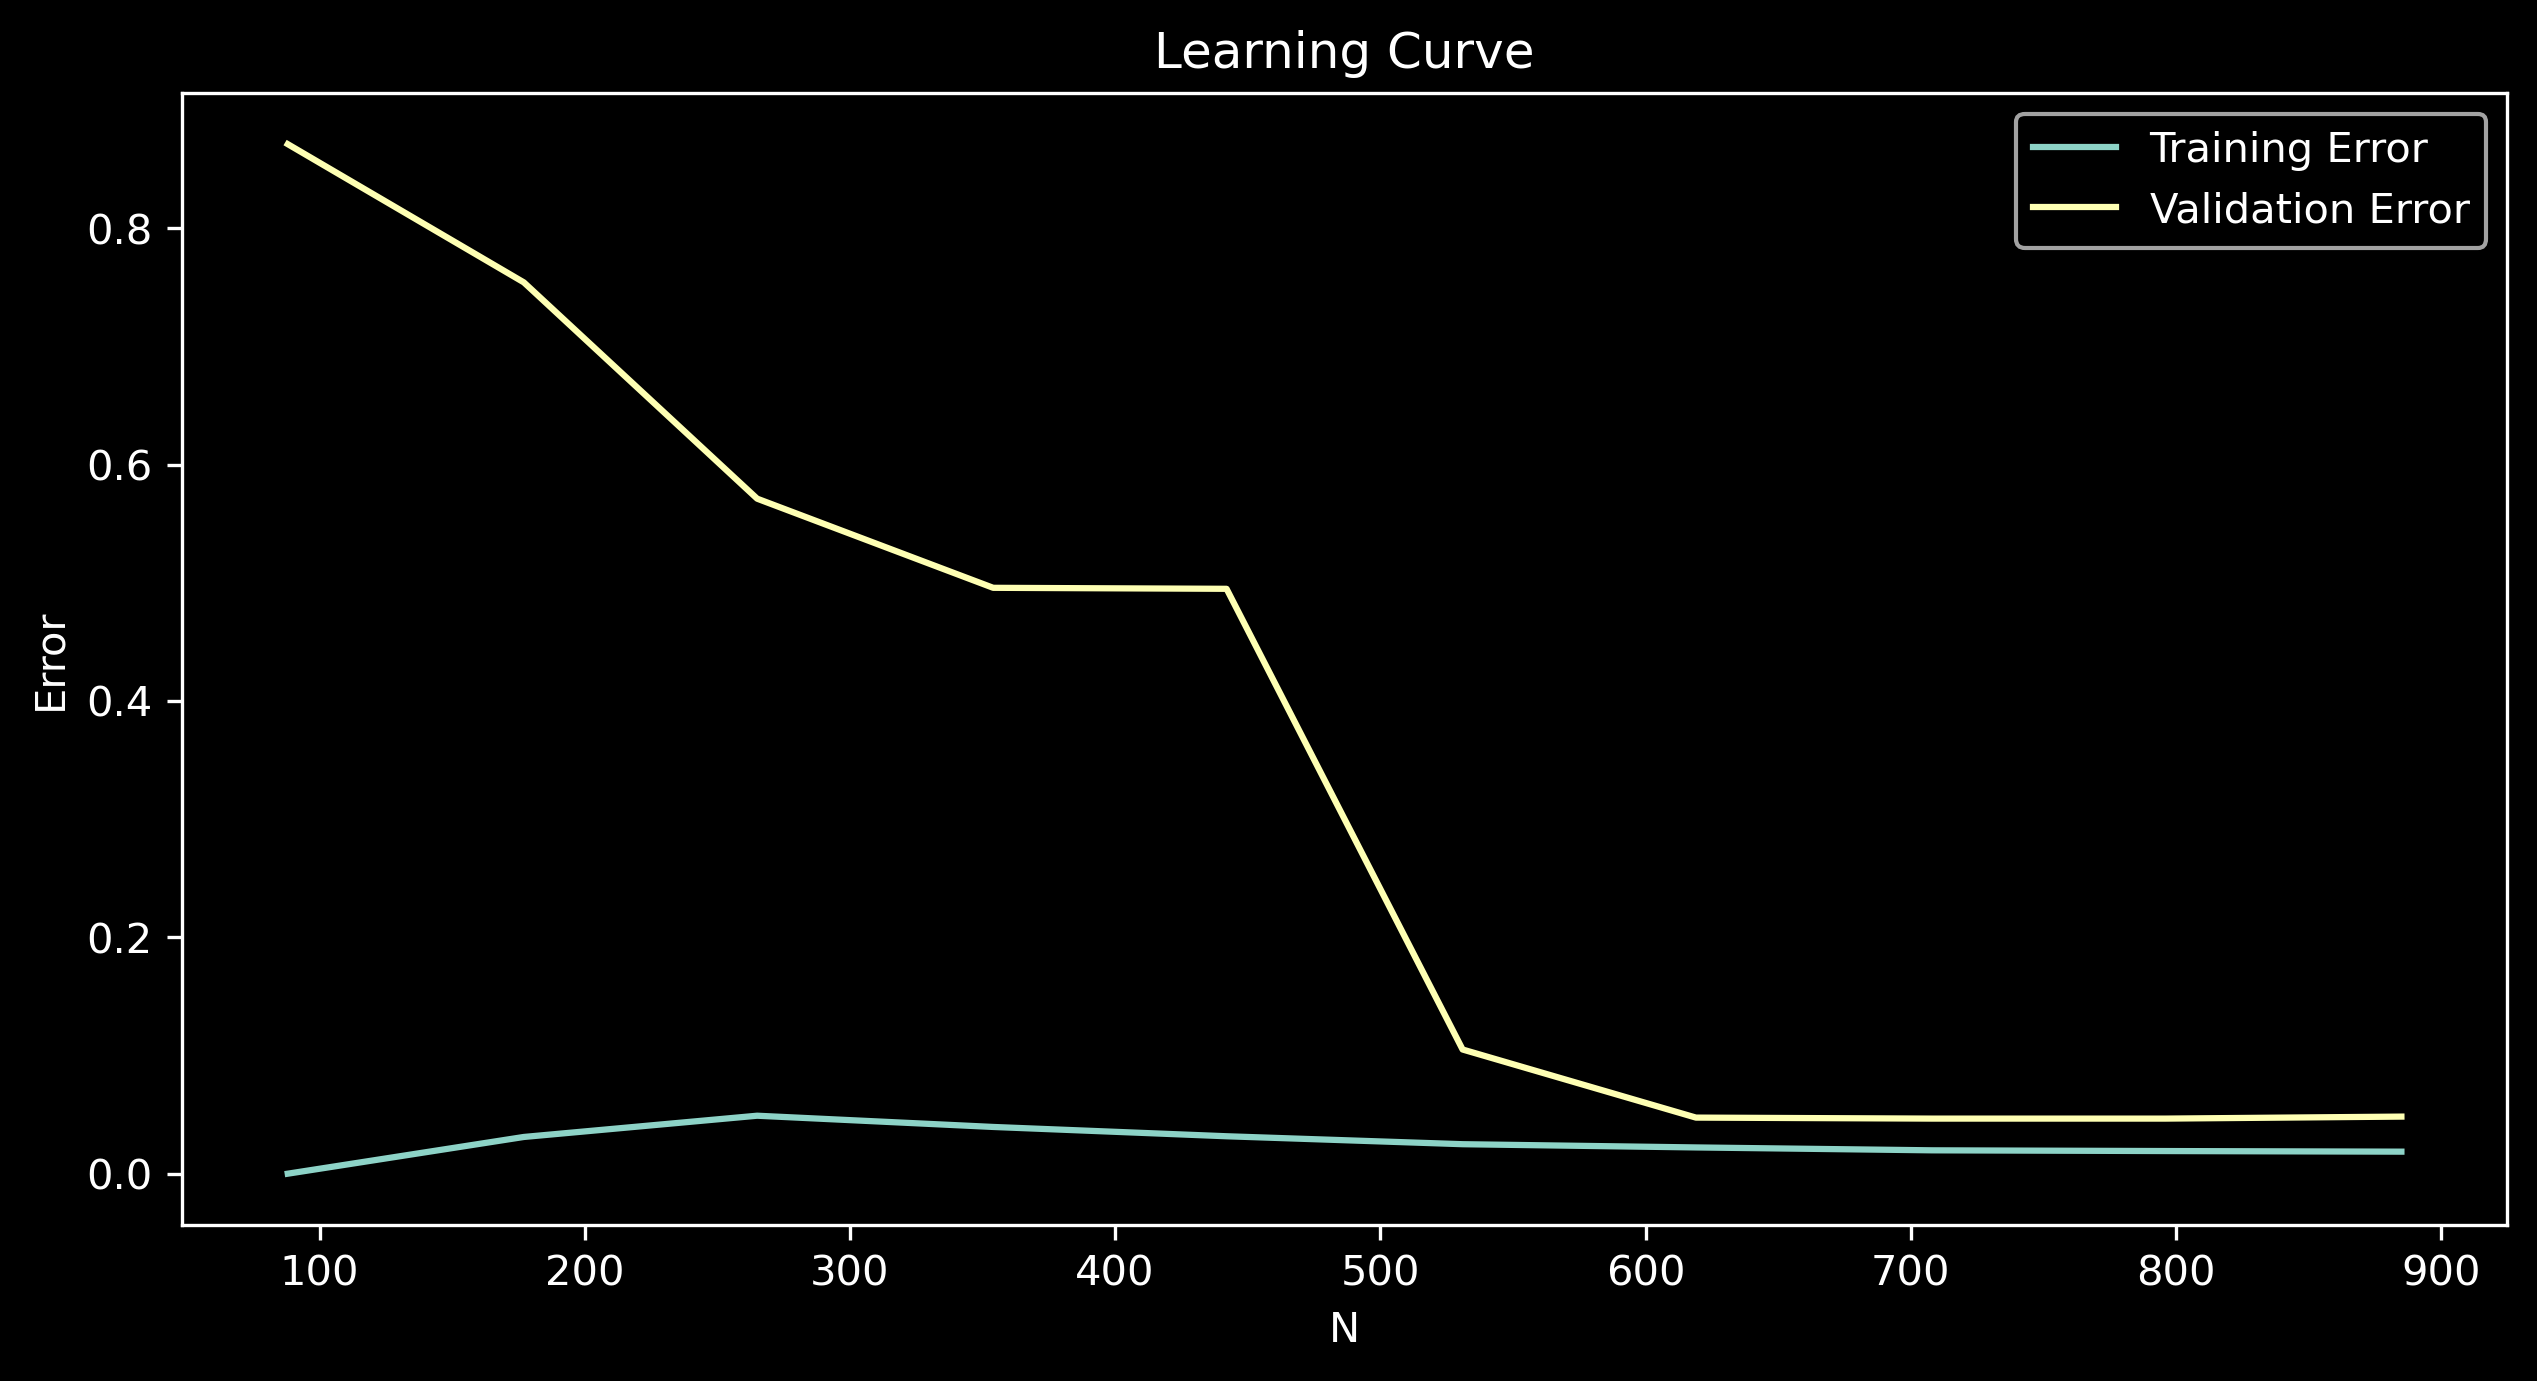

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
</font>

In [83]:
train_sizes=np.linspace(0.1, 1.0, 10)
learning_curves(clf, x_data_d, y_data_d, cv=4, N=train_sizes)
convey_insights([])

<h2><font color="LemonChiffon"> Hyperparameter Analysis </font></h2>

### Validation Curves

In [84]:
%%script false --no-raise-error
hyperparameters = {
    "n_estimators": np.linspace(100, 1000, 10).astype(int),
    "criterion" : ['gini', 'entropy'],
}
validation_curves(clf,x_data_d,y_data_d,5,hyperparameters)
convey_insights([])

Couldn't find program: 'false'


### Hyperparameter Search

In [86]:
%%script false --no-raise-error
opt_params = {}
param_dist = {
    "criterion" : ['gini', 'entropy'],
    "max_features" : [None, 'sqrt', 'log2'],
    "max_depth": list(np.linspace(1, 20, 10).astype(int)),
    "min_samples_split" : np.linspace(1, len(x_data_d)*0.05, 10).astype(int),
    "min_samples_leaf": np.linspace(1, len(x_data_d)*0.02, 10).astype(int),
}

x_data_d, y_data_d = read_data(kind='Numerical')
h_clf = RandomForestClassifier(n_estimators=100)
random_search = RandomizedSearchCV(estimator=h_clf, param_distributions=param_dist, n_iter=200,
                                scoring='accuracy', n_jobs=4, cv=5, random_state=42)

random_search.fit(x_data_d, y_data_d)

opt_params = random_search.best_params_
clear_output(wait=False)

opt_params['accuracy'] = random_search.best_score_
display(HTML(nice_table(opt_params, 'Optimal Configuration')))
opt_params.pop('accuracy', None)

# save hyperparameters
save_hyperparameters(model_name, opt_params)

convey_insights([])

Couldn't find program: 'false'


<h2><font color="LemonChiffon"> Features Analysis </font></h2>

### Feature Importance Analysis

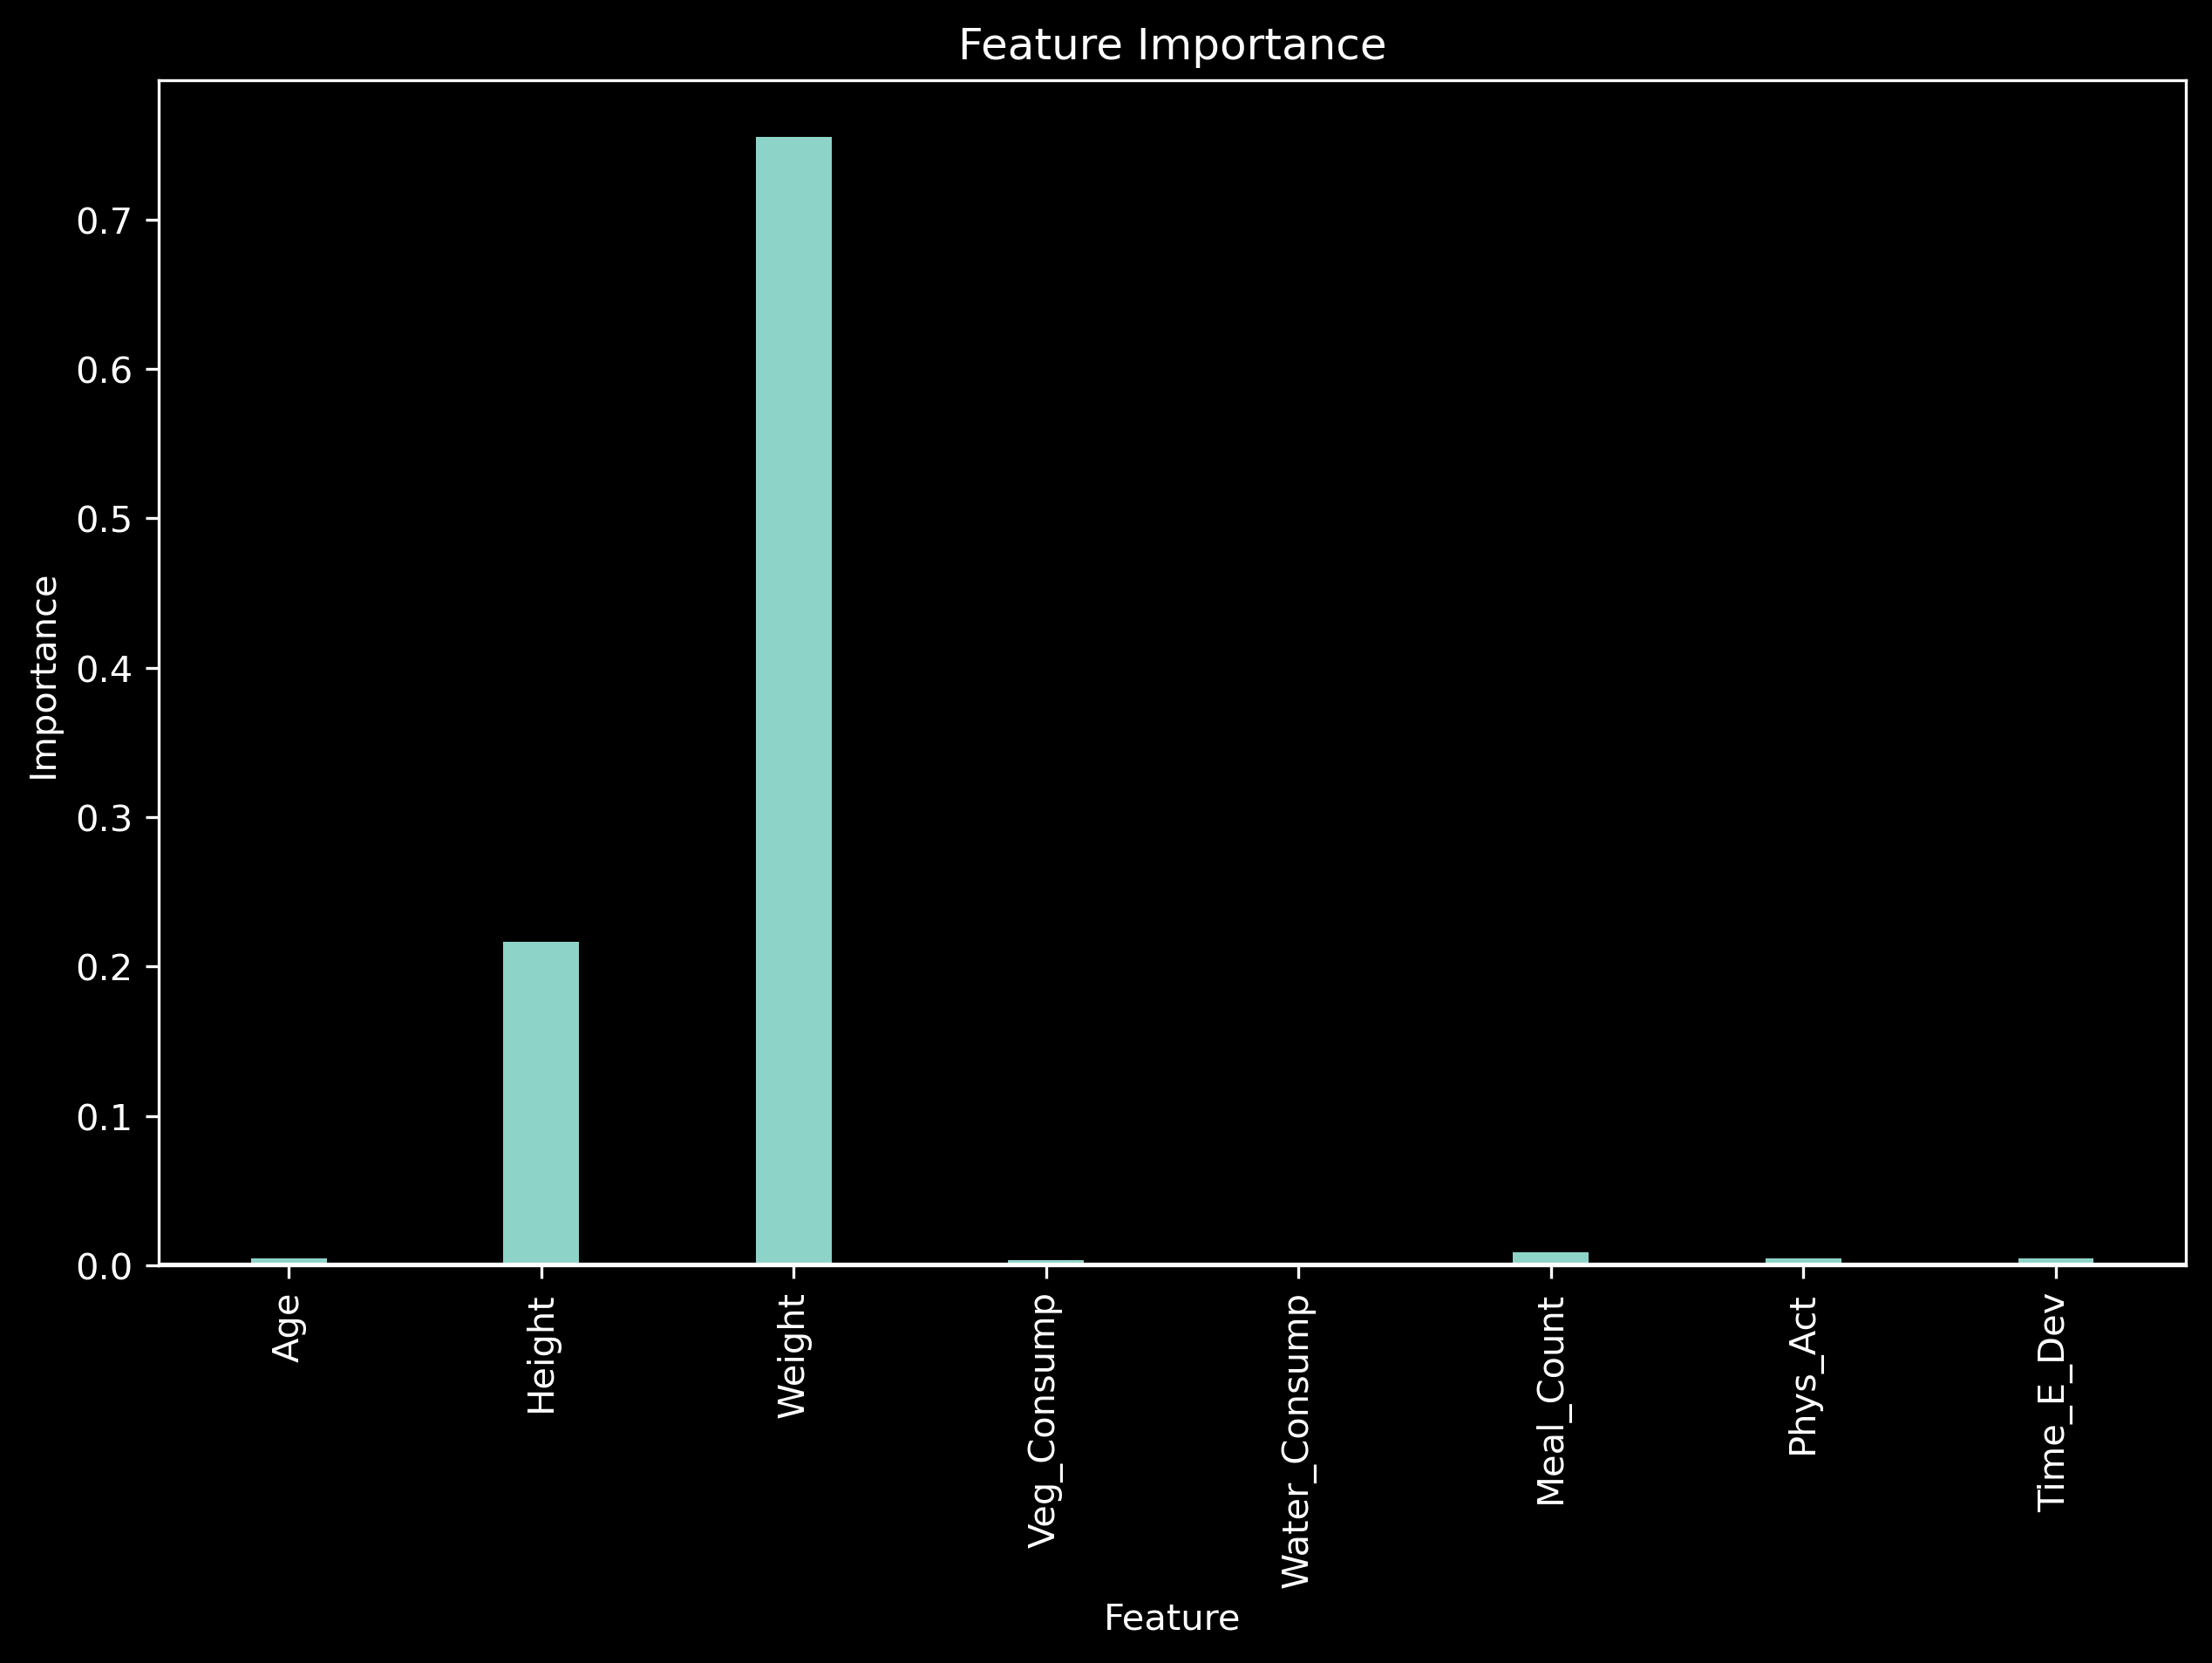

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> Only weight and height seem to be most relevant to descriminate the classes<br><br></font>

In [87]:
log_weights_analysis(clf, x_data_d)

convey_insights([
    "Only weight and height seem to be most relevant to descriminate the classes",
])


<h2><font color="LemonChiffon"> Model Visualization </font></h2>

#### Final Model

In [88]:
VisualizeModel(model_name, x_data_d, y_data_d, clf).double_whammy(animated=True)
convey_insights([])

../..\ModelPipelines\ModelVisualization.py:134: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  gif1 = np.array(gif1)


ValueError: could not broadcast input array from shape (960,1280,4) into shape (960,1280)